# Project 3 Part 2 EDA

### Task

Exploratory Data Analysis:

* [x] Load in your csv.gz's of results for each year extracted.
* [x] Concatenate the data into 1 dataframe for the remainder of the analysis.
* Once you have your data from the API, they would like you to perform some light EDA to show:
    * [x] How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
    * [x] Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    * [x] How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    * [x] What is the average revenue per certification category?
    * [x] What is the average budget per certification category?


Deliverables:
* After you have joined the tmdb results into 1 dataframe in the EDA Notebook
    * [ ] Save a final merged .csv.gz of all of the tmdb api data
    * [ ] The file name should be "tmdb_results_combined.csv.gz"
    * [ ] Make sure this is pushed to your github repository along with all of your code
    * [ ] One code file for API calls
    * [ ] One code file for EDA
    * [ ] Submit the link

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# settings
pd.options.display.float_format = '{:,.2f}'.format

### Loading, Viewing Data

In [2]:
# loading separate years
yr_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
yr_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

# concatenating into one DataFrame
df = pd.concat((yr_2000, yr_2001))

In [3]:
display(df.head(), df.info(), df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 0 to 1313
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2543 non-null   object 
 1   adult                  2541 non-null   float64
 2   backdrop_path          1369 non-null   object 
 3   belongs_to_collection  203 non-null    object 
 4   budget                 2541 non-null   float64
 5   genres                 2541 non-null   object 
 6   homepage               171 non-null    object 
 7   id                     2541 non-null   float64
 8   original_language      2541 non-null   object 
 9   original_title         2541 non-null   object 
 10  overview               2491 non-null   object 
 11  popularity             2541 non-null   float64
 12  poster_path            2282 non-null   object 
 13  production_companies   2541 non-null   object 
 14  production_countries   2541 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.00,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,"10,000,000.00","[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,"62,127.00",en,The Fantasticks,...,0.00,86.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.00,5.50,22.00,NaN
2,tt0113092,0.00,NaN,NaN,0.00,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,"110,977.00",en,For the Cause,...,0.00,100.00,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.00,5.10,8.00,NaN
3,tt0116391,0.00,NaN,NaN,0.00,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,"442,869.00",hi,Gang,...,0.00,152.00,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.00,4.00,1.00,NaN
4,tt0118694,0.00,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,"150,000.00","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.00,cn,花樣年華,...,"12,854,953.00",99.00,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.00,8.11,"2,162.00",PG


None

Index(['imdb_id', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'certification'],
      dtype='object')

### Filtering Data

In [4]:
# filtering for only movies with financial information present
finance = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()
some_finance = df[(df['budget'] > 0) | (df['revenue'] > 0)]

# confirming
display(df.shape, some_finance.shape, finance.shape)

(2543, 26)

(633, 26)

(354, 26)

In [5]:
# checking
some_finance[['budget', 'revenue']].sample(3)

,budget,revenue
72,"6,000,000.00","35,547,761.00"
487,0.00,"7,640,680.00"
125,0.00,"628,387.00"


In [6]:
# checking
finance[['budget', 'revenue']].sample(3)

,budget,revenue
27,"127,500,000.00","354,248,063.00"
721,"100,000.00","490,475.00"
949,"7,000,000.00","10,229,331.00"


### How Many Movies Have Financial Data?

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Of the 2543 entries in the original data (movies from years 2000 and 2001): 
* 633 entries had ***some*** financial information in either budget or revenue columns
* 354 had financial information in both budget and revenue columns
</i></font>

### How Many Movies are in Each Rating Category?

In [7]:
ratings = (
    finance
         .groupby('certification')
         .size()
         .reset_index(name='n_movies')
         .sort_values('n_movies', ascending=False)
         .rename(columns={'certification': 'rating'})
       )

ratings

,rating,n_movies
4,R,141
3,PG-13,117
2,PG,30
0,G,13
1,NR,7


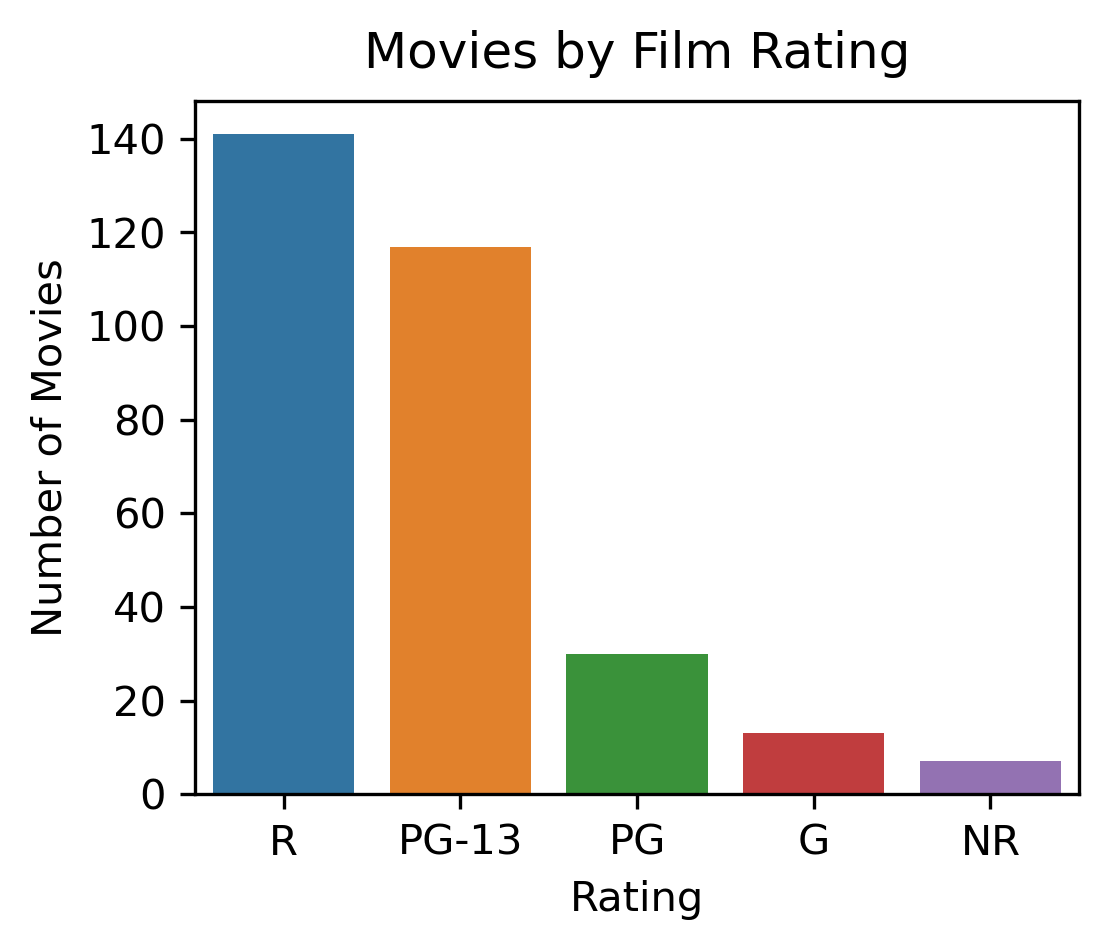

In [8]:
# plotting number of movies per film rating category
plt.figure(figsize=(3.8, 3), dpi=300)
sns.barplot(ratings, x='rating', y='n_movies')
plt.title('Movies by Film Rating', pad=8)
plt.xlabel('Rating')
plt.ylabel('Number of Movies');

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
It looks like we have a clear prevalence of movies with higher ratings in this dataset.
</i></font>

### What is the Average Revenue and Budget Per Rating Category?

In [9]:
finance_rating = (
            finance
            .groupby('certification')
            .agg(avg_budget=('budget','mean'), avg_revenue=('revenue', 'mean'))
            .reset_index()
            .sort_values('avg_revenue', ascending=False)
        )
finance_rating

,certification,avg_budget,avg_revenue
0,G,"44,000,000.00","133,216,881.69"
2,PG,"51,974,907.80","129,080,604.10"
3,PG-13,"46,644,422.11","111,073,959.08"
4,R,"27,028,468.44","52,736,978.25"
1,NR,"13,528,571.43","22,122,566.43"


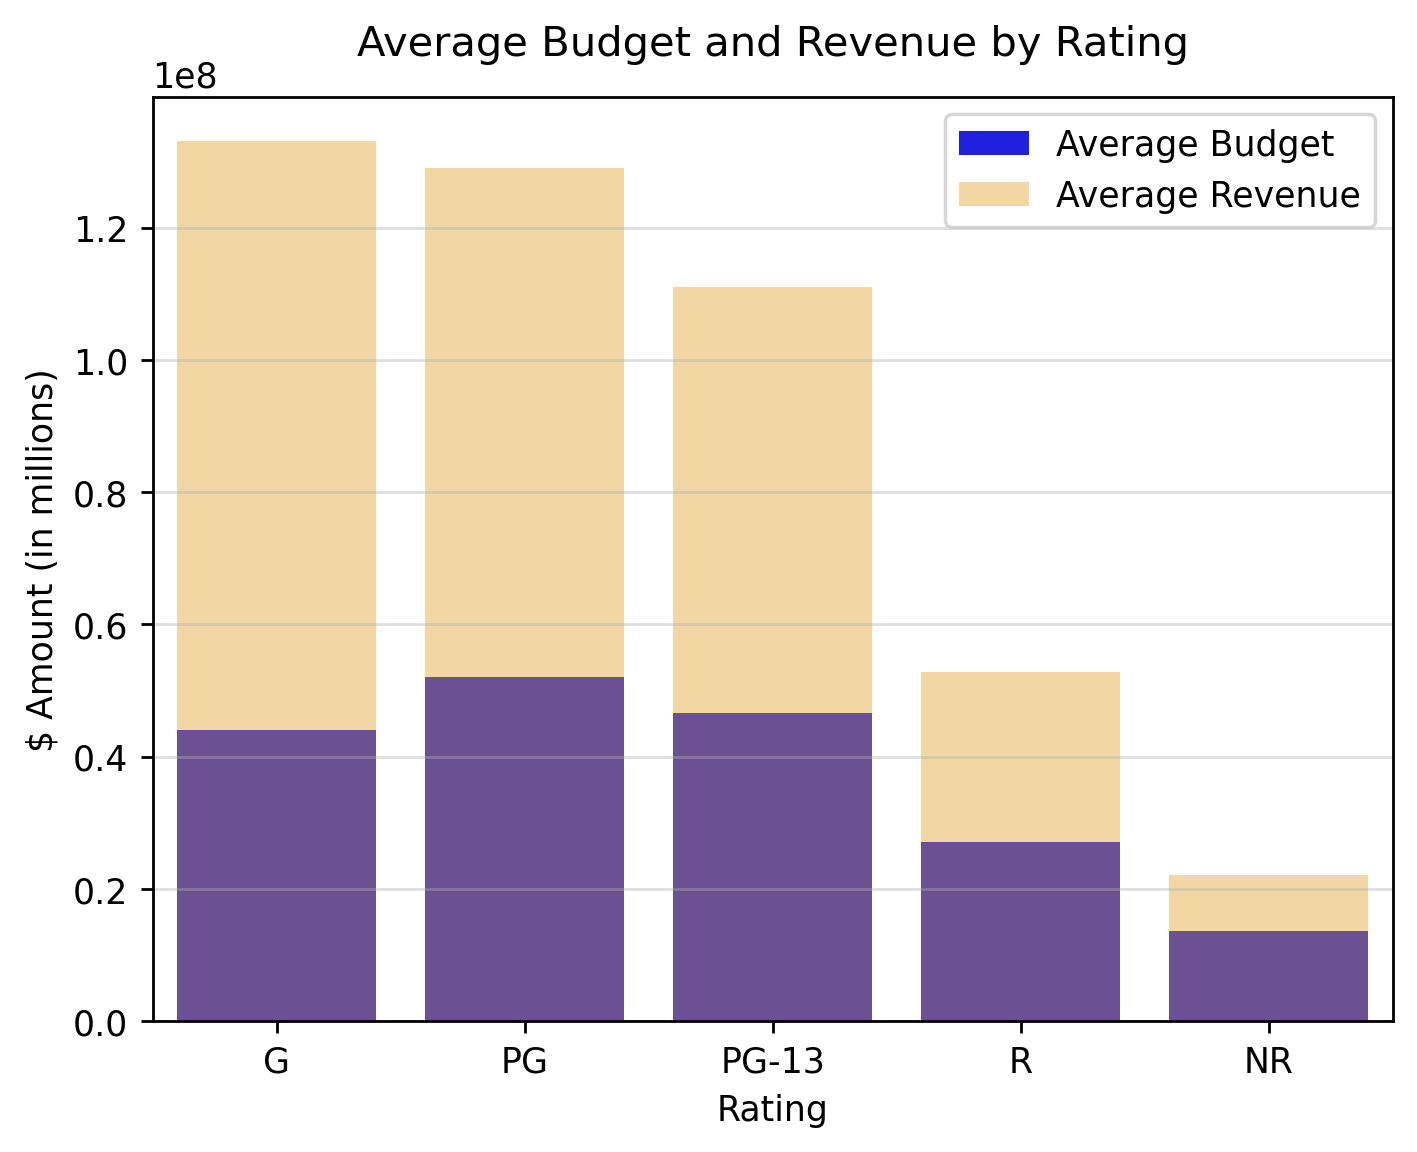

In [10]:
# plotting Budget and Revenue by Rating
plt.figure(dpi=250)
sns.barplot(data=finance_rating, x='certification', y='avg_budget', 
            color='blue', label='Average Budget')
sns.barplot(data=finance_rating, x='certification', y='avg_revenue', 
            color='orange', label='Average Revenue', alpha=.4)

# Setting plot title and axis labels
plt.title('Average Budget and Revenue by Rating', pad=12)
plt.xlabel('Rating')
plt.ylabel('$ Amount (in millions)')
plt.grid(axis='y', alpha=.4)
plt.legend();

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
The Average revenues and budgets for each rating category are listed in the DataFrame above and have also been visualized.  Interestingly, although movies with a G or PG rating are less frequent in this dataset, they appear to feature a higher rate of return when compared to other ratings.  I think this finding should be approached with caution, as there are several confounding factors in the data collection, record collecting that may be contributing to this disparity.
</i></font>